In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision
import torch.nn.functional as F

In [8]:
class Image_network(nn.Module):
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.fc1x = nn.Linear(x_dim, 1)
        self.fc1y = nn.Linear(y_dim, 1)
        self.fc2 = nn.Linear(2, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x, y):
        x = F.relu(self.fc1x(x))
        y = F.relu(self.fc1y(y))
        h = torch.cat((x, y), dim=1)
        h = F.relu(self.fc2(h))
        h = self.fc3(h)
        return h

In [10]:
def scale_rgb(x):
    return ((x - x.min()) / (x.max() - x.min()))

In [12]:
lam_array = [0.0005, 0.01, 0.05, 0.1, 0.5]
for i in range(len(lam_array)):
    lam = lam_array[i]
    lam_str = str(lam)

    T = torch.load('mineT'+ lam_str + '.pth')
    Tweights = T.fc1x.weight.detach().cpu().numpy()[0]
    unflat_Tweights = np.reshape(Tweights, (3, 224//5,224//5))

    plt.pcolormesh(scale_rgb(unflat_Tweights[0]), edgecolors='k', linewidth=0.005)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.colorbar()
    plt.title("T weights channel 0, lambda="+lam_str)
    plt.savefig("Tweightsc0" + lam_str + ".pdf")
    plt.clf()

    plt.pcolormesh(unflat_Tweights[1], edgecolors='k', linewidth=0.005)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.colorbar()
    plt.title("T weights channel 1, lambda="+lam_str)
    plt.savefig("Tweightsc1" + lam_str + ".pdf")
    plt.clf()

    plt.pcolormesh(unflat_Tweights[2], edgecolors='k', linewidth=0.005)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.colorbar()
    plt.title("T weights channel 2, lambda="+lam_str)
    plt.savefig("Tweightsc2" + lam_str + ".pdf")
    plt.clf()

    plt.pcolormesh(np.transpose(np.array(list(map(scale_rgb, unflat_Tweights))), (1,2,0)), edgecolors='k', linewidth=0.005)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.colorbar()
    plt.title("T weights combined channels, lambda="+lam_str)
    plt.savefig("Tweightscomb" + lam_str + ".pdf")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [13]:
loss_log5 = np.load('loss0.005.npy')
loss_log1 = np.load('loss0.001.npy')

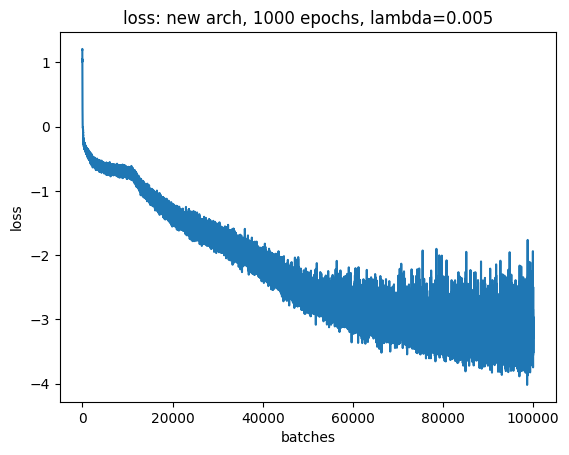

In [19]:
plt.figure()
plt.plot(np.stack(loss_log5))
plt.title("loss: new arch, 1000 epochs, lambda=0.005")
plt.ylabel("loss")
plt.xlabel("batches")
# plt.show()
plt.savefig("loss0.005.pdf")

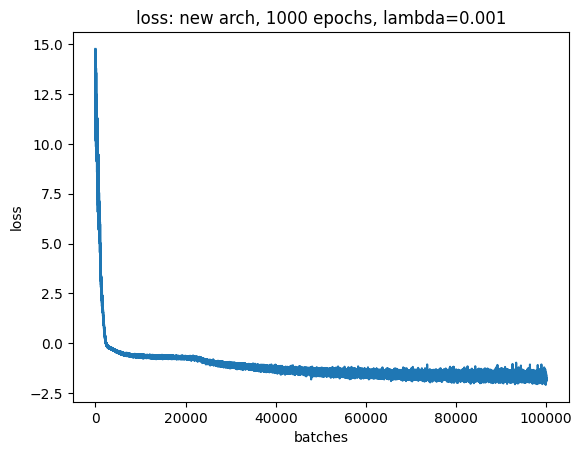

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure()
plt.plot(np.stack(loss_log1))
plt.title("loss: new arch, 1000 epochs, lambda=0.001")
plt.ylabel("loss")
plt.xlabel("batches")
plt.show()
plt.savefig("loss0.001.pdf")